In [1]:
import matplotlib.pyplot as plt
from VLC_init import *
from pose_estimation import *
from rtof_pos import *
from Roberts import *

In [2]:
vlc_obj = VLC_init()

tx_cord_1, tx_cord_2, tx_cord_3, tx_cord_4 = ((-5, 2), (-5, 3)), ((-3, 0), (-3, 1)), ((-4, 1), (-4, 2)), ((-6, 2), (-6, 3))
rx_cord = ((0, 0), (0, 1))
tx_cords = [tx_cord_1, tx_cord_2, tx_cord_3, tx_cord_4]

In [3]:
x_pose, y_pose, x_roberts, y_roberts, x_becha, y_becha = [], [], [], [], [], []
x, y = [], []
for i in range(len(tx_cords)):
    # updating the given coordinates
    print("Iteration #", i ,": ")
    vlc_obj.update_coords(tx_cords[i], rx_cord)
#     vlc_obj.update_lookuptable()
    x.append(vlc_obj.trxpos)
    y.append(vlc_obj.trypos)
    # providing the environmentt to methods
    aoa = Pose(vlc_obj)
    rtof = RToF_pos(vlc_obj)
    tdoa = Roberts(vlc_obj)
    # making estimations
    tx_aoa = aoa.estimate()
    print("AoA finished")
    tx_rtof = rtof.estimate()
    print("RToF finished")
    tx_tdoa = tdoa.estimate()
    print("TDoA finished")
    # storing to plot later
    x_pose.append(tx_aoa[0])
    y_pose.append(tx_aoa[1])
    x_becha.append(tx_rtof[0])
    y_becha.append(tx_rtof[1])
    x_roberts.append(tx_tdoa[0])
    y_roberts.append(tx_tdoa[1])

Iteration # 0 : 
AoA finished
RToF finished
TDoA finished
Iteration # 1 : 
AoA finished


/Users/furkansahbaz/elec491/VLC_init.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  azimuth = math.atan(((x + self.rxradius * math.cos(self.relative_heading)) / y)) - math.atan(
/Users/furkansahbaz/elec491/VLC_init.py:109: RuntimeWarning: divide by zero encountered in double_scalars
  ((x - self.rxradius * math.cos(self.relative_heading)) / y))


RToF finished
TDoA finished
Iteration # 2 : 
AoA finished
RToF finished
TDoA finished
Iteration # 3 : 
AoA finished
RToF finished
TDoA finished


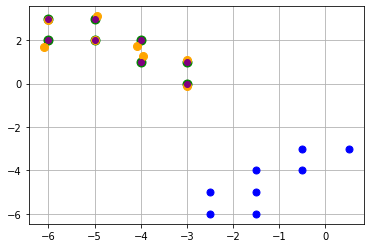

In [4]:
plt.figure()
plt.plot(x, y,'o', color='green', markersize=9)
plt.plot(x_becha, y_becha, 'o', color='orange', markersize=8)
plt.plot(x_pose, y_pose, 'o', color='blue', markersize=7)
plt.plot(x_roberts, y_roberts, 'o', color='purple', markersize=6)
plt.grid()